## Stonks

- Course Roadmap (grade request note; email question include code)
- Data exploration into the stock market using Yahoo Finance data 
- Ticker data for GameStop Corp., NYSE: GME

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

class YahooAPI(object):
    def __init__(self, interval="1d"):
        self.base_url = "https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={start_time}&period2={end_time}&interval={interval}&events=history"
        self.interval = interval
    def __build_url(self, ticker, start_date, end_date):
        return self.base_url.format(ticker=ticker, start_time=start_date, end_time=end_date, interval=self.interval)
    def get_ticker_data(self, ticker, start_date, end_date):
        # must pass datetime into this function
        epoch_start = int(time.mktime(start_date.timetuple()))
        epoch_end = int(time.mktime(end_date.timetuple()))
        return pd.read_csv(self.__build_url(ticker, epoch_start, epoch_end))
    
if __name__ == '__main__':
    dh = YahooAPI()
    df = dh.get_ticker_data("gme", pd.Timestamp("2020-03-01"), pd.Timestamp("2021-03-01"))
    display(df.tail())

,Date,Open,High,Low,Close,Adj Close,Volume
246,2021-02-22,46.689999,48.509998,42.400002,46.000000,46.000000,19476000
247,2021-02-23,44.970001,46.230000,40.000000,44.970001,44.970001,7565200
248,2021-02-24,44.700001,91.709999,44.700001,91.709999,91.709999,83111700
249,2021-02-25,169.559998,184.679993,101.000000,108.730003,108.730003,150308800
250,2021-02-26,117.459999,142.899994,86.000000,101.739998,101.739998,91963000


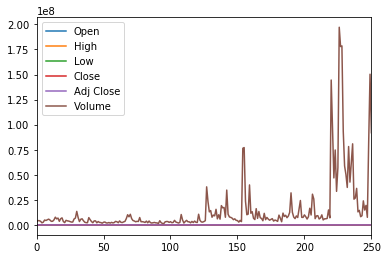

In [33]:
%matplotlib inline
df.plot()   #plotting df

What is wrong with the plot?
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

In [34]:
#modify x-axis with a label and by time
#seperate lines that are blended together
#stretch graph to better read volatility 
#volume is dwarfing everything else
#introduce scale on the right

In [35]:
df['Open'].max(), df['Open'].min()   #Max price in Open and Min price in open

(379.709991, 2.85)

In [36]:
df.columns #looking at columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [37]:
df = df.set_index(pd.to_datetime(df['Date'])) #Taking dates in the Date column and creating a column with datetime format then setting them as the index
display(df.head())  #display df
print(df.index) #showing that it is an index

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-03-02,2020-03-02,3.60,3.85,3.39,3.83,3.83,3208400
2020-03-03,2020-03-03,3.88,3.89,3.50,3.63,3.63,4282500
2020-03-04,2020-03-04,3.71,3.83,3.46,3.77,3.77,4257600
2020-03-05,2020-03-05,3.70,3.99,3.59,3.96,3.96,3599400
2020-03-06,2020-03-06,3.84,4.07,3.76,3.92,3.92,2096800


DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2021-02-12', '2021-02-16', '2021-02-17', '2021-02-18',
               '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)


In [38]:
df = df.drop('Date', axis=1) #dropping the column with the old dates
df.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,3.60,3.85,3.39,3.83,3.83,3208400
2020-03-03,3.88,3.89,3.50,3.63,3.63,4282500
2020-03-04,3.71,3.83,3.46,3.77,3.77,4257600
2020-03-05,3.70,3.99,3.59,3.96,3.96,3599400
2020-03-06,3.84,4.07,3.76,3.92,3.92,2096800


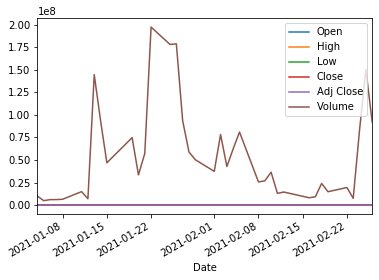

In [39]:
df.loc['2021-01-01': '2021-03-01'].plot() #getting everything from this year and plotting it

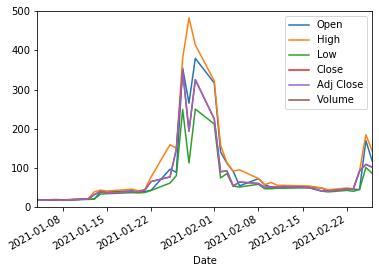

In [40]:
df.loc['2021-01-01': '2021-03-01'].plot(ylim=(0, 500)) #setting y limit to make things more clear

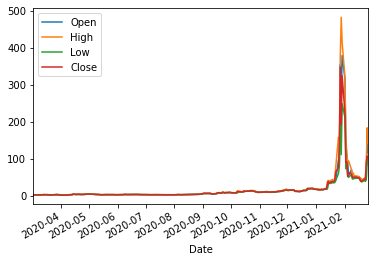

In [41]:
prices = ['Open', 'High', 'Low', 'Close'] #list of prices
df[prices].plot() #get the names with data from the list and plot

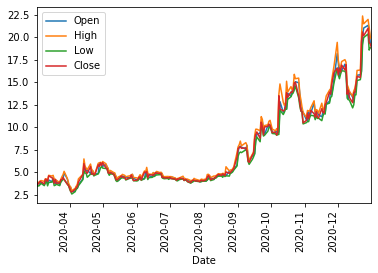

In [42]:
df.loc[:'2020-12-31'][prices].plot(rot=90) #get data from start date to 2020-12-31 and prices then plot with labels at 90 degrees

### Data Restructuring

- Poll Question 1
- Use the opening and closing prices to upsample
- Stock exchange opens at 9am and closes at 4pm


In [43]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,3.60,3.85,3.39,3.83,3.83,3208400
2020-03-03,3.88,3.89,3.50,3.63,3.63,4282500
2020-03-04,3.71,3.83,3.46,3.77,3.77,4257600
2020-03-05,3.70,3.99,3.59,3.96,3.96,3599400
2020-03-06,3.84,4.07,3.76,3.92,3.92,2096800


In [44]:
open_time = pd.Timedelta('9H')
close_time = pd.Timedelta('16H')

open_df = pd.DataFrame({'Price': df['Open'].values}, index=df.index + open_time)  #creating dataframe 
close_df = pd.DataFrame({'Price': df['Close'].values}, index=df.index + close_time)
display(open_df.head())
display(close_df.head())

,Price
Date,
2020-03-02 09:00:00,3.60
2020-03-03 09:00:00,3.88
2020-03-04 09:00:00,3.71
2020-03-05 09:00:00,3.70
2020-03-06 09:00:00,3.84


,Price
Date,
2020-03-02 16:00:00,3.83
2020-03-03 16:00:00,3.63
2020-03-04 16:00:00,3.77
2020-03-05 16:00:00,3.96
2020-03-06 16:00:00,3.92


In [45]:
prices_df = pd.concat([open_df, close_df]) #combining both dataframes
display(prices_df.head()) #shows the 900 first because concat works by appending to the end of the dataframe
prices_df = prices_df.sort_index() #sorting the index
prices_df.head() #now sorted by day

,Price
Date,
2020-03-02 09:00:00,3.60
2020-03-03 09:00:00,3.88
2020-03-04 09:00:00,3.71
2020-03-05 09:00:00,3.70
2020-03-06 09:00:00,3.84


,Price
Date,
2020-03-02 09:00:00,3.60
2020-03-02 16:00:00,3.83
2020-03-03 09:00:00,3.88
2020-03-03 16:00:00,3.63
2020-03-04 09:00:00,3.71


In [46]:
display(prices_df['2021-02-01':'2021-02-08'].resample('H').asfreq().head(10)) #without ffill
prices_df['2021-02-01':'2021-02-08'].resample('H').asfreq().ffill().head(10)  #going from both specified dates and resampling to provide hour and fills NaaN with number initial numbers

,Price
Date,
2021-02-01 09:00:00,316.559998
2021-02-01 10:00:00,NaN
2021-02-01 11:00:00,NaN
2021-02-01 12:00:00,NaN
2021-02-01 13:00:00,NaN
2021-02-01 14:00:00,NaN
2021-02-01 15:00:00,NaN
2021-02-01 16:00:00,225.000000
2021-02-01 17:00:00,NaN


,Price
Date,
2021-02-01 09:00:00,316.559998
2021-02-01 10:00:00,316.559998
2021-02-01 11:00:00,316.559998
2021-02-01 12:00:00,316.559998
2021-02-01 13:00:00,316.559998
2021-02-01 14:00:00,316.559998
2021-02-01 15:00:00,316.559998
2021-02-01 16:00:00,225.000000
2021-02-01 17:00:00,225.000000


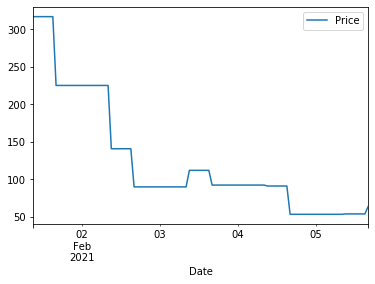

In [47]:
prices_df['2021-02-01':'2021-02-07'].resample('H').asfreq().ffill().plot() #plotting

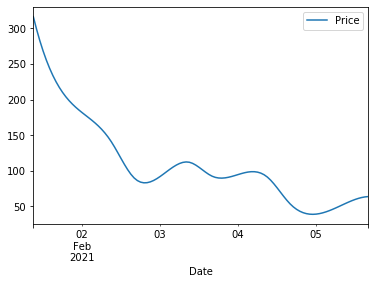

In [48]:
prices_df['2021-02-01':'2021-02-07'].resample('H').interpolate(method='polynomial', order=3).plot() #interpolating with a polynomial

In [49]:
prices_df = prices_df.resample('H').interpolate(method='polynomial', order=3) #
prices_df

,Price
Date,
2020-03-02 09:00:00,3.600000
2020-03-02 10:00:00,3.635995
2020-03-02 11:00:00,3.671258
2020-03-02 12:00:00,3.705602
2020-03-02 13:00:00,3.738836
2020-03-02 14:00:00,3.770773
2020-03-02 15:00:00,3.801224
2020-03-02 16:00:00,3.830000
2020-03-02 17:00:00,3.856912


## Calculating \$

- Poll question 2
- Approximate amount traded in a day
- Day with greatest loss and greatest gain
- Rolling volume: https://www.marketwatch.com/story/gamestops-stock-surge-is-making-it-one-of-the-most-traded-in-the-u-s-11611767301

In [50]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,3.60,3.85,3.39,3.83,3.83,3208400
2020-03-03,3.88,3.89,3.50,3.63,3.63,4282500
2020-03-04,3.71,3.83,3.46,3.77,3.77,4257600
2020-03-05,3.70,3.99,3.59,3.96,3.96,3599400
2020-03-06,3.84,4.07,3.76,3.92,3.92,2096800


In [51]:
display(df['Volume'].resample('H').asfreq()) #resampling Volume column by hour as frequency
display(df['Volume'].resample('H').asfreq().ffill()) #resampling Volume column by hour as frequency and filling in NaaNs

Date
2020-03-02 00:00:00     3208400.0
2020-03-02 01:00:00           NaN
2020-03-02 02:00:00           NaN
2020-03-02 03:00:00           NaN
2020-03-02 04:00:00           NaN
                          ...    
2021-02-25 20:00:00           NaN
2021-02-25 21:00:00           NaN
2021-02-25 22:00:00           NaN
2021-02-25 23:00:00           NaN
2021-02-26 00:00:00    91963000.0
Freq: H, Name: Volume, Length: 8665, dtype: float64

Date
2020-03-02 00:00:00      3208400.0
2020-03-02 01:00:00      3208400.0
2020-03-02 02:00:00      3208400.0
2020-03-02 03:00:00      3208400.0
2020-03-02 04:00:00      3208400.0
                          ...     
2021-02-25 20:00:00    150308800.0
2021-02-25 21:00:00    150308800.0
2021-02-25 22:00:00    150308800.0
2021-02-25 23:00:00    150308800.0
2021-02-26 00:00:00     91963000.0
Freq: H, Name: Volume, Length: 8665, dtype: float64

In [52]:
prices_df['Volume'] = df['Volume'].resample('H').asfreq().div(24).ffill()  #taking volume column and resampling by hour as frequency then divide by 24 to see how much volume per hour and ffill to get rid of naan
prices_df.head()

,Price,Volume
Date,,
2020-03-02 09:00:00,3.600000,133683.333333
2020-03-02 10:00:00,3.635995,133683.333333
2020-03-02 11:00:00,3.671258,133683.333333
2020-03-02 12:00:00,3.705602,133683.333333
2020-03-02 13:00:00,3.738836,133683.333333


In [53]:
def get_dollars_traded(row):   #creating function that goes through row
    return row['Price'] * row['Volume']  #returns Price column number and Volume column of the row

dollar_volume = prices_df.apply(get_dollars_traded, axis = 1).resample('D').sum()['2021-01-26'] #takes price_df dataframe and applies get_dollar_traded function then resamples to day then gets sum and pulls the number for 2021-01-26

In [54]:
print(f"${dollar_volume:,.2f}") #prints out the dollar volume variable to the second decimal place

$22,231,044,641.89


In [55]:
df['Volume'].rolling(20).apply(np.mean)['2021-01-26'] #going through volumne column with a 20 day window applying mean and getting number for 2021-01-26

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


54534155.0

In [56]:
#break everything by week to see the max amount of money you could gain or lose
def get_greatest_weekly_change(x): # x is a series for everything in a week
    i_max = x.idxmax() #creating variable to get the datetime of greatest price
    i_min = x.idxmin() #gets datetime of highest price that week
    
    if i_max < i_min: #if max date is less than minimum
        return pd.Series({'change': x[i_min] - x[i_max], 'start': i_max, 'end': i_min}) #return a series with change being x of i_min - x of i_max  the start is the i_max start date and the end is the i_min end date
    return pd.Series({'change': x[i_max] - x[i_min], 'start': i_min, 'end': i_max}) #if i_max is greater than i_min than change is x of i_max minus x of i_min  the start is the i_max start date and the end is the i_min end date
    
weekly_changes = prices_df['Price'].resample('W').apply(get_greatest_weekly_change).unstack() #taking price column and resampling by week and applying get_greatest_weekly_change function then unstack so you don't get a multi level index
weekly_changes['change'] = weekly_changes['change'].astype('float64')
weekly_changes.head()

,change,start,end
Date,,,
2020-03-08,-0.477815,2020-03-05 20:00:00,2020-03-08 23:00:00
2020-03-15,1.409435,2020-03-09 00:00:00,2020-03-14 04:00:00
2020-03-22,-1.539032,2020-03-17 00:00:00,2020-03-22 02:00:00
2020-03-29,1.749215,2020-03-23 00:00:00,2020-03-27 05:00:00
2020-04-05,-2.158750,2020-03-30 00:00:00,2020-04-05 05:00:00


In [57]:
weekly_changes['change'].idxmax() #week where you could make the most money

Timestamp('2021-01-31 00:00:00', freq='W-SUN')

In [58]:
weekly_changes['change'].idxmin() #week where you could make the least money

Timestamp('2021-02-07 00:00:00', freq='W-SUN')

In [59]:
weekly_changes.head()

,change,start,end
Date,,,
2020-03-08,-0.477815,2020-03-05 20:00:00,2020-03-08 23:00:00
2020-03-15,1.409435,2020-03-09 00:00:00,2020-03-14 04:00:00
2020-03-22,-1.539032,2020-03-17 00:00:00,2020-03-22 02:00:00
2020-03-29,1.749215,2020-03-23 00:00:00,2020-03-27 05:00:00
2020-04-05,-2.158750,2020-03-30 00:00:00,2020-04-05 05:00:00


In [60]:
initial_investment = 10000
buy = weekly_changes.loc[weekly_changes['change'].idxmax()]['start'] #for weekly_changes get the week where you make the most and get the start
sell = weekly_changes.loc[weekly_changes['change'].idxmax()]['end'] #for weekly_changes get the week where you make the most and get the sell
no_of_shares = initial_investment // prices_df.loc[buy, 'Price'] #number of shares you can afford is your initial investment divided by prices_df loc on buy price in Price

print("Dates: {} to {}".format(buy, sell))
print("Number of Shares", no_of_shares)
print("Buy Price", prices_df.loc[buy, 'Price'])
print("Sell Price", prices_df.loc[sell, 'Price'])
print("Cost Basis", prices_df.loc[buy, 'Price'] * no_of_shares)


profit = no_of_shares * (prices_df.loc[sell, 'Price'] - prices_df.loc[buy, 'Price']) #number of shares times sell price minus buy price
print("Profit", profit) #profit

Dates: 2021-01-26 00:00:00 to 2021-01-31 18:00:00
Number of Shares 152.0
Buy Price 65.58905555939616
Sell Price 400.7788957953451
Cost Basis 9969.536445028216
Profit 50948.855715864236


In [61]:
initial_investment = 10000
buy = weekly_changes.loc[weekly_changes['change'].idxmin()]['start'] #for weekly_changes get the week where you make the least and get the start
sell = weekly_changes.loc[weekly_changes['change'].idxmin()]['end'] #for weekly_changes get the week where you make the least and get the sell
no_of_shares = initial_investment // prices_df.loc[buy, 'Price'] #number of shares you can afford is your initial investment divided by prices_df loc on buy price in Price

print("Dates: {} to {}".format(buy, sell))
print("Number of Shares", no_of_shares)
print("Buy Price", prices_df.loc[buy, 'Price'])
print("Sell Price", prices_df.loc[sell, 'Price'])
print("Cost Basis", prices_df.loc[buy, 'Price'] * no_of_shares)


profit = no_of_shares * (prices_df.loc[sell, 'Price'] - prices_df.loc[buy, 'Price']) #number of shares times sell price minus buy price
print("Profit", profit) #profit

Dates: 2021-02-01 00:00:00 to 2021-02-04 23:00:00
Number of Shares 25.0
Buy Price 388.9835842379799
Sell Price 39.595119959294585
Cost Basis 9724.589605949499
Profit -8734.711606967134
